# CSC-321: Data Mining and Machine Learning
# Irene Yin

## Assignment 5: Working with real data

For this notebook, you should use your own implementation of ML code. That means use your own functions for SLR, MLR, SGD, , Logistic Regression, zeroR etc. I will tell you if you should use scikit implementations.

**FORMATTING NOTE:** What follows is a series of experiements, using different datasets, with different numbers of instances and features. You're going to end up with a long notebook containing all kinds of print statements and cells containing numbers. It is VERY easy to get confused. I strongly suggest the following:
- minimize output. This is tricky, given that you should ALWAYS do sanity checks on your data (using functions like .info(),.head() and .describe() that I introduce below). I recommend performing them, but then comment out the print statement. Once you've checked your data you don't have to always display it.
- Keep what output you have COMPACT. Don't overdo it, squashing things up together, but be mindful of spacing, like I suggested with the output of your SGD function. 
- Feel free, once you are convinced things like SGD work, to replace the constant output of epoch/learning rate etc. I edit mine to print just TWICE. Once at the start (epoch 0), and once at the end. This isn't optimal, but I'll explain why later.
- ALWAYS print the following information at the top of any cell when you run an experiment: Data set name, number of instances, number of features
- ALWAYS include algorithm name when printing a result. 

In grading your notebook, I WILL BE ATTENTIVE TO LAYOUT AND PRESENTATION OF RESULTS. If you're just dumping numbers to the screen you're going to have a bad time.

There are cells below where you have to edit things, or write things, and there are cells where you have to just run them, and observe the results. I recommend running this notebook one cell at a time, and making sure you are clear on what the cell is doing, and why.

### Part 1: Loading Data

We're going to make use of the pandas library (because pandas are cute/not_cute(*)) to load data and to get a quick overview. For the first data set, I'm going to walk you through some typical commands. Note that in your work, you don't always have to print these out, it's just good practice as you're working through a problem. I have lost track of the number of times I have sliced a data set, and left behind more instances or features than I intended to. 

For reference:
- [Pandas](https://pandas.pydata.org/)

(*)delete as appropriate

Run the following cell.

In [ ]:
%matplotlib inline
import pandas as pd

# Load the data

insurance_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/insurance.csv')

# Show the head - just the first 5 entries

insurance_data.head()


,108,392.5
0,19,46.2
1,13,15.7
2,124,422.2
3,40,119.4
4,57,170.9


Look at the data above. The column headings should look weird. That's because pandas decided to treat the first row as column headings. I can prevent that by supplying my own column headings, which I demonstrate below. 

I chose X and y. While this is illustrative for this example, it's bad. Why?
Those aren't the actual column headings. What are they? You'll need to find out by looking at the information for the data set. I include a link, below. You should ALWAYS know what the data represents. 

It's a good idea in pandas to use descriptive but short names for your columns, as we are going to use them for indexing. I would avoid using spaces in column names, and use underscores instead: e.g. 'birth date', should be 'birth_date' or 'DOB'. That said, also avoid acronyms that ONLY mean something to you.

(a) Edit the column headings below, to be more descriptive based on your understanding of the data described below.

- [Insurance Data](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html)

In [ ]:


insurance_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/insurance.csv', names=['X','y'])

insurance_data.head()

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Now that I have column headings, I can use them in pandas. For example, if I wanted to extract just the column called 'X' into a new data frame, I would write:

new_df = insurance_data['X'].copy()

The .copy() is so that I make a new copy of the values, rather than references to entries in a data frame, which can have unintended side effects. Dataframes are MUTABLE - any change I make to the contents of a dataframe can be permanent. 


The next few cells are showing typical information we want to know about our data. We can use the .info() method, to see counts of instances, columns, and data types.

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


And we can use .describe() to get more detailed information. 
- The count is the number of entries for that column. 
- The mean is the average value. 
- The std is the value for one standard deviation 
  - i.e. in our y column, the mean is 98.19, and the std is 87.33
  - That means that one standard deviation either side of the mean ranges from 10.86 to 185.52
  - We can expect around 68% of our data to
fall in this range, IF our data is normally distributed. 
- The min and the max are...well, I think you know
- The quartile values (25/50/75) show what the value is at those markers
  - i.e. 25% of all our values of X are below 7.5

In [ ]:
insurance_data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


Let's take a graphical look at the data. As there are only two features, we can plot one against the other, just as you did with the data in assignment 2.

First I'm going to extract the values from the pandas dataframe, using the .values attribute. That puts the values into a numpy array, that I've called insurance_values

(b) Slice insurance_values into 2 datasets, X_values and y_values. Note that to work with scikit, the X_values should be an array of 63 instances, and 1 column (NOT a 1-Dimensional vector). i.e. it should have shape (63,1). y_values SHOULD be a 1-Dimensional vector, i.e. have shape (63,). Refer back to Assignment 1 if you need to refresh your memory. IT's ALWAYS a good idea to print out the number of instances (rows) and the number of features (columns) to make sure you're not accidentally messing with things. I've done that for you. If you're slicing is correct, the y values will have the SAME number of instances. It doesn't have a column value - because it's a one dimensional vector.

(c) Plot X_values against y_values so we can visualize the instances. Make each instance a blue triangle. Label the axes appropriately, using the same names as your column headings from a.


This is the insurance data training set. It has 63 instances, and it has 1 input features.
This is the insurance data y values. It has 63 instances.


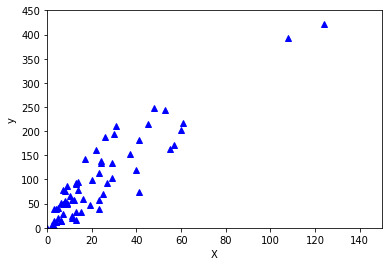

In [ ]:

# Slice your data

insurance_values = insurance_data.values

X_values = insurance_values[:,:-1]
y_values = insurance_values[:,len(insurance_values[0])-1]

rows,cols = X_values.shape
print("This is the insurance data training set. It has", rows, "instances, and it has", cols, "input features.")
rows, = y_values.shape
print("This is the insurance data y values. It has", rows, "instances.")

import matplotlib.pyplot as plt

# Plot your graph
plotDataX = [i[0] for i in insurance_values]
plotDataY = [i[1] for i in insurance_values]
plt.plot(plotDataX, plotDataY,'b^')
plt.axis([0,150,0,450])
plt.xlabel("X")
plt.ylabel("y")
plt.show()



### Part 2: Learning from real data

If you've done it right, you should have a visual sense of a relationship in the data between the X and y values. That tells us what kind of model we might want to learn.

We'll start by using a training and test set that are the same, so create X_train and y_train, and X_test and y_test as copies of X_values and y_values. 


(d) Copy your linear regression code from Assignment 2 below. Run simple linear regression on this data, to get predicted y values for X_test.

(e) Copy your zeroR code from Assignment 2. Run zeroR on the data, to get predicted y values

(f) Plot both zeroR and slr predicted relationships as lines (red for slr, green for zeroR), as well as the blue data points above.

(g) Calculate and print RMSE for both zeroR and slr, compared to y_test.

(h) In the text box, INTERPRET these scores for me. **This is the important bit.** Can you tell me what these RMSE scores REALLY mean with respect to this data? To answer that, you have to understand the insurance data. Refer back to the link I gave you for the data earlier. ALSO tell me if you think we can do better? Do you believe there are other models that will generate LOWER error scores?

REMEMBER: We're predicting y values. What are those? Remember too that RMSE returns you the average error over all predictions, and that the error is expressed in the same units as the thing we're predicting. How does this help us?


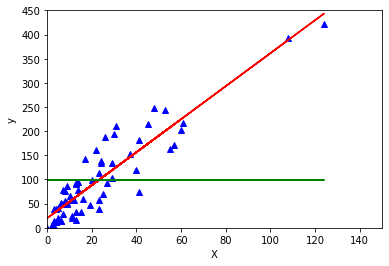

RMSE score for linear regression: 35.37
RMSE score for zeroR: 86.63


In [ ]:
import numpy as np
# Add your code here
#insurance_values = insurance_values.tolist()

X_train = [i[0] for i in insurance_values]
X_test = X_train
y_train = y_values
y_test = y_train

#d)

def getMean(inputList):
  # return: the average (the mean) for any list of values(numbers).
  return np.mean(inputList)


def getVariance(inputList):
  # return: the total variance of a list of values.
  meanValue = getMean(inputList)
  variance = 0
  for num in inputList:
    variance += (num-meanValue)**2
  return variance

def getCovariance(inputListX, inputListY, meanX, meanY):
  # return: covariance between two lists of numbers.
  covariance = 0
  for i in range(len(inputListX)):
    covariance += (inputListX[i]-meanX)*(inputListY[i] - meanY)
  return covariance


def getCoefficient(inputListX, inputListY):
  # return: coefficient b0 and b1 in a single list.
  meanOfX = getMean(inputListX)
  meanOfY = getMean(inputListY)
  b1 = getCovariance(inputListX,inputListY,meanOfX,meanOfY)/getVariance(inputListX)
  b0 = getMean(inputListY)-b1*meanOfX
  return [b0,b1]


def slr(Xtrain,ytrain,Xtest):
  # return: a list that hold the predictions. 
  coef = getCoefficient(Xtrain,ytrain)
  b0 = coef[0]
  b1 = coef[1]
  prediction = []
  for num in Xtest:
    prediction.append(b0+b1*num)
  return prediction

slr_predY = slr(X_train,y_train,X_test)

#e
def zeroRR(ytrain, Xtest):
  # return: compute the mean from the ytrain values and return the list of predictions.
  meanOfytrain = np.mean(ytrain)
  prediction = []
  for num in Xtest:
    prediction.append(meanOfytrain)
  return prediction

ZeroR_predict = zeroRR(y_train, X_test)

#f
plotDataX = [i[0] for i in insurance_values]
plotDataY = [i[1] for i in insurance_values]
plt.plot(plotDataX, plotDataY,'b^')
plt.axis([0,150,0,450])
plt.xlabel("X")
plt.ylabel("y")
plt.plot(plotDataX, slr_predY, 'r')
plt.plot(plotDataX, ZeroR_predict,'g')
plt.show()

#g)
def rmse(actual, predicted):
  # return: prediction error.
  predictionError = 0.0
  for i in range(len(actual)):
    predictionError += (actual[i] - predicted[i])**2
  predictionError_avg = predictionError/len(actual)
  predictionError_avg = predictionError_avg**0.5
  return predictionError_avg

slr_rmse = rmse(y_test,slr_predY)
zr_rmse = rmse(y_test,ZeroR_predict)

print('RMSE score for linear regression: {:.2f}'.format(slr_rmse))
print('RMSE score for zeroR: {:.2f}'.format(zr_rmse))

RMSE is to measure the error of a model in predicting numeric data. It tells us the average error of payments predictions for each set of claims. The RMSE here means for each set of claims, the payments should be (RMSE value)thousands of Swedish Kronor for geographical zones in Sweden + - predicted payments. According to these data, Linear Regression did a better job than zeroR because for each set of claims, the predicted payments would in error of 35.37 thousands of Swedish Kronor for geographical zones in Sweden, which is better than the error of 86.63 thousands of Swedish Kronor for geographical zones in Sweden. 

No I don't think we can't do better because the line that LR has is already fitting very well on the data via the graph. 


### Part 3: Normalization

When working with data that has multiple inputs, we often want to normalize the data, so that it's all on the same scale (usually 0-1, using min-max normalization). The steps to do that are below. 

We're going to use min-max normalization, that works by:

normalized value = (value - minOfFeature) / (maxOfFeature - minOfFeature)

Below I'm going to use pandas to load a different dataset. This one is about wine. You can [read a bit about the data](http://archive.ics.uci.edu/ml/datasets/Wine+Quality). 

(i) Choose meaningful headings for the columns


In [ ]:
 labels = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide'
                        ,'density','pH','sulphates','alcohol','quality']


wine_data = pd.read_csv('https://raw.githubusercontent.com/nixwebb/CSV_Data/master/winequality-white.csv',names= labels
                        )

wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(j) Get a little more information about our data, using the .describe() method. 

Pay attention to the values for each feature. Note that they are NOT on the same scale (and look at the min and max values for each). All the features are numerical, including the last feature, which is a representation of a quality of wine, on the scale 0-10. 

Also note how many features (columns) there are, and how many instances.

In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# Call describe here
wine_data.describe()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Because there are lots of features (more than 2) it makes no sense to plot this data on a graph - as humans we find it quite hard to visualize more than 3 dimensions (and each feature is a dimension).

You should see above that there are different ranges for the feature values. We want to NORMALIZE this data, to make learning easier for the algorithm, and so that we can realistically compare things like coefficient values.

We're going to use the sklearn.preprocessing library to help us. I've done most of the work, you just need to extract the X_values and the y_values from the data. I always print out the shape of my data as a sanity check that I haven't lost anything.

(k) Extract the wine values from the wine data frame, and then slice out the X_values and y_values from the numpy array of values. Check that the number of instances and features matches what you expect looking at the output in the cell above.

Then see how I apply the minmax scaler below. The transform function works on my data to perform normalization, and I can apply it to any new incoming data. But ONLY if that data has the same number of features as the data I used here! You can read more at:

- [MinMax Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract the values from the pandas dataframe


wine_value = wine_data.values

X_values = wine_value[:,:-1]
y_values = wine_value[:,len(wine_value[0])-1]

# Get the shape, and print meaningful things
# Make sure this agrees with the decribe method, above

rows,cols = X_values.shape
print("This is the wine data set. It has", rows, "instances, and it has", cols, "input features.\n")
print("The first FIVE instances look like:")

# Show the first five instances
print(X_values[:5])
print()

# Load and fit the scaler

scaler = MinMaxScaler()
scaler.fit(X_values)

# Use some attributes of the scaler to show min and max values per feature
# Note these should align with the information from the pandas .describe
# method, used above

print("MAX values:",scaler.data_max_)
print("MIN values:",scaler.data_min_)
print()

# Transform our X_values, so that data is now scaled
# Note we can apply this transform to any data, including new data
# and it will preserve the min and max values given above

X_values = scaler.transform(X_values)

# Take another look at those first five instances that should now be 
# normalized

print("After normalization, the first FIVE instances look like:")
print(X_values[:5])


[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
 1.001e+00 3.000e+00 4.500e-01 8.800e+00]
This is the wine data set. It has 4898 instances, and it has 11 input features.

The first FIVE instances look like:
[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00]
 [8.100e+00 2.800e-01 4.000e-01 6.900e+00 5.000e-02 3.000e+01 9.700e+01
  9.951e-01 3.260e+00 4.400e-01 1.010e+01]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00]]

MAX values: [1.42000e+01 1.10000e+00 1.66000e+00 6.58000e+01 3.46000e-01 2.89000e+02
 4.40000e+02 1.03898e+00 3.82000e+00 1.08000e+00 1.42000e+01]
MIN values: [3.8     0.08    0.      0.6     0

Now that we've normalized the data, let's try a couple of learning tasks. The class in this data is a numerical value in the range 0-10. Let's first try multivariate linear regression (mlr, because there's more than one input feature), and see if we can predict that value.

As usual, you'll need to create X_train and y_train sets, and X_test and y_test sets that are copies of X_values and y_values.

(l) Copy over your MLR and SGD code. Train your MLR using the normalized data above. Use 100 epochs, and a learning rate of 0.001. Predict y values. Calculate RMSE. Compare to zeroR RMSE.

(m) Those scaled coefficients mean we can compare them to each other. Interpret the results for me. What do they really mean with respect to this data? What IS this data? What are we predicting, and how do those coefficients help us understand?  

(n) Print (NICELY) the feature names, and their associated coefficient values that you learned using SGD. Print them side by side please. If you had to pick only three features, which would you pick and why? 

(o) If you've copied over your code from assignment 3, you should be getting an output from your SGD algorithm at the end of each epoch, including the total error. Make a note of the total training error after 100 epochs of training. Increase the epochs to 500. Estimate what impact this will have on the overall final error of your classifier (the RMSE). Write down the final training error after 500 epochs. Also note the RMSE for both models, one trained for 100 epochs and one trained for 500 epochs. What's the difference in RMSE? 

In [ ]:
import math

# Add you code for (l) through (o) here
X_train = X_values
X_test = X_train
y_train = y_values
y_test = y_train

#i)
#MLR SGD
def predFunc(inputlist, coefficient):
  # input: the length of coeficent is one more than the length of inputlist. 
  #        We assume the coefficient list contains all the coefficients, including b0.
  # return: the predicted output value.
  predOutput = coefficient[0]
  for i in range(len(coefficient)-1):
    nextIndex = i+1
    predOutput += coefficient[nextIndex]*inputlist[i]
  return predOutput

def coefficientsSGD(train,test,learning_rate,epochs):
  # return: the coefficients
  coefficient = [0.0 for j in range(len(train[0])+1)]
  for iteration in range(epochs):
    Totalerror = 0
    for i in range(len(train)):
      prediction = predFunc(train[i],coefficient)
      error = prediction - test[i]
      Totalerror += error**2
      coefficient[0] -= learning_rate * error
      for index in range(len(coefficient)-1):
        coefficient[index+1] -= learning_rate * error * train[i][index]
    print("epoch number =", iteration, "learning rate = ", learning_rate,
          "total error = %.3f" %Totalerror)
  return coefficient

def mlr(X_train, y_train, X_test, Learning_rate, Epochs):
  coefficient = coefficientsSGD(X_train, y_train, Learning_rate, Epochs)
  predictions = []
  for instance in X_test:
    predictions.append(predFunc(instance, coefficient))
  return predictions

learning_rate = 0.001
epochs = 100
mlr_predY = mlr(X_train.tolist(), y_train.tolist(), X_test.tolist(), learning_rate, epochs)
mlr_predY = np.array(mlr_predY)

#zeroR
ZeroR_predict = zeroRR(y_train, X_test)

#RMSE
mlr_rmse = rmse(y_test,mlr_predY)
zr_rmse = rmse(y_test,ZeroR_predict)

print('RMSE score for MLR: {:.2f}'.format(mlr_rmse))
print('RMSE score for zeroR: {:.2f}'.format(zr_rmse))

#n)
coefficient = coefficientsSGD(X_train, y_train, learning_rate, epochs)
fetures_name = ['INTERCEPT','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide'
                        ,'density','pH','sulphates','alcohol']

for i in range(len(coefficient)):
  data = '%.3f'%coefficient[i]
  print('{:^20}'.format(fetures_name[i]), ":", '%10s'%data)






epoch number = 0 learning rate =  0.001 total error = 13411.349
epoch number = 1 learning rate =  0.001 total error = 3531.277
epoch number = 2 learning rate =  0.001 total error = 3435.699
epoch number = 3 learning rate =  0.001 total error = 3362.113
epoch number = 4 learning rate =  0.001 total error = 3303.830
epoch number = 5 learning rate =  0.001 total error = 3256.379
epoch number = 6 learning rate =  0.001 total error = 3216.764
epoch number = 7 learning rate =  0.001 total error = 3182.954
epoch number = 8 learning rate =  0.001 total error = 3153.558
epoch number = 9 learning rate =  0.001 total error = 3127.608
epoch number = 10 learning rate =  0.001 total error = 3104.418
epoch number = 11 learning rate =  0.001 total error = 3083.493
epoch number = 12 learning rate =  0.001 total error = 3064.465
epoch number = 13 learning rate =  0.001 total error = 3047.058
epoch number = 14 learning rate =  0.001 total error = 3031.056
epoch number = 15 learning rate =  0.001 total er

(m) The coefficients are the data that could help us to know which features would have greater influence. The coefficients would influence our prediction. The bigger magnitude of the coefficient, the greater influence the feature would have on the predicted output.


(n) If I have to pick 3 coefficient, I would pick volatile acidity, residual sugar, and alcohol becasue these three features have relatively more influences towards the output data. Their absolute values are the three that are higher than the others.

(o) The total error for epoch = 100 is 2776.988. The RMSE score for MLR is 0.76, which is smaller than the zeroR 0.89.

The total error for epoch = 500 is 2760.047. The RMSE score for MLR is still 0.76.

The RMSE doesn't change, but the total error gets smaller by using 500 iterations.



### Part 4: Feature Selection

Let's see how well you perform at selecting features. I asked you in part (n) above to pick 3 features using the coefficient scores above. When you loaded the data into pandas, you should have named your features something sensible. You should be able to take those string names, and replace them in my code, below. I'll take those string names, and copy ONLY those columns out of the original wine data frame, along with the class value - the last one in the table.

(p) You need to rescale the data, because we're taking a copy of the unscaled data, which is annoying. Extract the values from the new data frame, create X and y value arrays, and scale the X values using the same process as above. You need to create a new scaler, because there are now a different number of features.

(q) Then call YOUR MLR function on this new, reduced data set, with the learning rate of 0.001 and 100 epochs. Also perform zeroR, and calcualte RMSE for both. 

(r) Compare the RMSE score for THIS experiment, with the previous one with all the features. What's the difference? What did we learn? Tell me in a text box. ALSO - tell me about this experiment as a whole. Did it seem reasonable? Was using MLR a good idea? Are there alternatives? I want your thoughts and impressions.

In [ ]:
feature1 = 'volatile_acidity'
feature2 = 'residual_sugar'
feature3 = 'alcohol'
feature4 = 'quality' # This one MUST be the name of your class column

reduced_wine = wine_data[[feature1,feature2,feature3,feature4]].copy()

#p)
# Get the values from the data above, and slice out the X_values and y_values
reduced_wine_value = reduced_wine.values

X_values = reduced_wine_value[:,:-1]
y_values = reduced_wine_value[:,len(reduced_wine_value[0])-1]

# Get the shape, and print meaningful things
rows,cols = X_values.shape
print("This is the reduced wine data set. It has", rows, "instances, and it has", cols, "input features.\n")

# Call the scaler, then run the experiments
scaler = MinMaxScaler()
scaler.fit(X_values)

print("MAX values:",scaler.data_max_)
print("MIN values:",scaler.data_min_)
print()

# Transform our X_values, so that data is now scaled
# Note we can apply this transform to any data, including new data
# and it will preserve the min and max values given above

X_values = scaler.transform(X_values)

# Take another look at those first five instances that should now be 
# normalized

print("After normalization, the first FIVE instances look like:")
print(X_values[:5])


#q)
X_train = X_values
X_test = X_train
y_train = y_values
y_test = y_train

prediction_Y = mlr(X_train, y_train, X_test, learning_rate, epochs)
prediction_zeroR = zeroRR(y_train, X_test)

mlr_rmse2 = rmse(y_test,prediction_Y)
zr_rmse2 = rmse(y_test,prediction_zeroR)

print('RMSE score for MLR: {:.2f}'.format(mlr_rmse2))
print('RMSE score for zeroR: {:.2f}'.format(zr_rmse2))



This is the reduced wine data set. It has 4898 instances, and it has 3 input features.

MAX values: [ 1.1 65.8 14.2]
MIN values: [0.08 0.6  8.  ]

After normalization, the first FIVE instances look like:
[[0.18627451 0.30828221 0.12903226]
 [0.21568627 0.01533742 0.24193548]
 [0.19607843 0.09662577 0.33870968]
 [0.14705882 0.12116564 0.30645161]
 [0.14705882 0.12116564 0.30645161]]
epoch number = 0 learning rate =  0.001 total error = 17827.822
epoch number = 1 learning rate =  0.001 total error = 3269.655
epoch number = 2 learning rate =  0.001 total error = 3232.696
epoch number = 3 learning rate =  0.001 total error = 3200.487
epoch number = 4 learning rate =  0.001 total error = 3171.144
epoch number = 5 learning rate =  0.001 total error = 3144.373
epoch number = 6 learning rate =  0.001 total error = 3119.924
epoch number = 7 learning rate =  0.001 total error = 3097.574
epoch number = 8 learning rate =  0.001 total error = 3077.127
epoch number = 9 learning rate =  0.001 total e

The RMSE score for these three chosen features is 0.77, which is very similar to the RMSE for 11 features(0.76). These shows that the real dependent features are these three features. Theses three features are the features that really influence the predictions. This indeed seems reasonable because the coefficients of these features also have greater absolute value than the others', which illustrates that these features are the dominant features. 

I think MLR did a good job in this because MLR is doing predictions based on multiple variables(features). More importantly, the RMSE score of MLR is lower than the RMSE score of the baseline, which is pretty cool.

Missing interpretation: The average error for each level of quality for wine is rising by just 0.01 point. [We have to interpret what the data is doing respect to what does the data means.!!!]

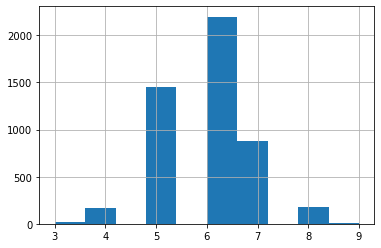

In [ ]:
vals_df = reduced_wine['quality'].copy()
vals_df.hist()

### Part 5: Evaluation

In this final section, we'll do the following things. We're going to work with an actual diabetes data set. You can find more about this data set here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

(s) You are going to:

- load the data into a pandas dataframe
- print out some basic information about the data (number of instances, features), and do it nicely
- Slice you data into X_values and y_values (**USE THESE NAMES!**)
- normalize all columns EXCEPT the class, we don't usually normalize the class column, in the range 0-1
- The class column contains two values, 0 and 1. You should understand what those represent from the information about the data set. This is a classification task
- Use YOUR logistic regression code, with a learning rate of 0.1, and 100 epochs
- Use your zeroRC code
- Calculate accuracy for both, and print
- Tell me something about the results. Using the coefficient values might help.

Feel free to cut this up as you want. Add extra cells, or format the problem in a way that makes sense to you. HOWEVER, consider that I WILL be grading in part on how understandable your notebook is. BE MINDFUL of my advice at the beginning of this notebook. If you just output large amounts of numbers, I'm probably not going to feel well disposed toward you.

You're going to be looking at the following functions:
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [KFold selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)
- [Stratified KFold selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)



In [ ]:
# Write your code here

import pandas as pd

filename = 'https://raw.githubusercontent.com/nixwebb/CSV_Data/master/pima-indians-diabetes.csv'
column_name = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
diabetes_data = pd.read_csv(filename,names = column_name)
diabetes_data.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()
diabetes_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#print info about data 
from sklearn.preprocessing import MinMaxScaler
diabetes_values = diabetes_data.values
X_values = diabetes_values[:,:-1]
y_values = diabetes_values[:,len(diabetes_values[0])-1]

rows,cols = X_values.shape
print("This is the wine data set. It has", rows, "instances, and it has", cols, "input features.\n")


#normalize 
print("The first FIVE instances look like:")

# Show the first five instances
print(X_values[:5])
print()

# Load and fit the scaler

scaler = MinMaxScaler()
scaler.fit(X_values)

# Use some attributes of the scaler to show min and max values per feature
# Note these should align with the information from the pandas .describe
# method, used above

print("MAX values:",scaler.data_max_)
print("MIN values:",scaler.data_min_)
print()

# Transform our X_values, so that data is now scaled
# Note we can apply this transform to any data, including new data
# and it will preserve the min and max values given above

X_values = scaler.transform(X_values)

# Take another look at those first five instances that should now be 
# normalized

print("After normalization, the first FIVE instances look like:")
print(X_values[:5])


This is the wine data set. It has 768 instances, and it has 8 input features.

The first FIVE instances look like:
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]

MAX values: [ 17.   199.   122.    99.   846.    67.1    2.42  81.  ]
MIN values: [ 0.     0.     0.     0.     0.     0.     0.078 21.   ]

After normalization, the first FIVE instances look like:
[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25

In [ ]:
# Logestic Regression
import math
X_train = X_values
X_test = X_train
y_train = y_values
y_test = y_train

def pred(instance, coefficient):
  #return: a prediction
  exponent = coefficient[0]
  for i in range(len(coefficient)-1):
    exponent += coefficient[i+1]*instance[i]
  predY = 1.0/(1.0 + math.exp(-exponent))
  return predY

def sgd_log(X_train, y_train, learning_rate, epochs):
  # return the coefficients.
  coefficient = [0.0 for j in range(len(X_train[0])+1)]
  for iteration in range(epochs):
    Totalerror = 0
    for i in range(len(X_train)):
      preditedY = pred(X_train[i],coefficient)
      error = y_train[i] - preditedY
      Totalerror += error**2
      coefficient[0] += learning_rate * error * preditedY*(1.0-preditedY)
      for index in range(len(coefficient)-1):
        coefficient[index+1] += learning_rate * error *preditedY*(1.0-preditedY)* X_train[i][index]
    print(">epoch=", iteration, "lrate=", learning_rate,
          "error=%.3f" %Totalerror)
  return coefficient

def log_reg(X_train, y_train, X_test, learning_rate, epochs):
  # return prediction
  coefficient = sgd_log(X_train, y_train, learning_rate, epochs)
  print("Coefficient is: ", coefficient)
  predictions = []
  for i in range(len(X_test)):
    predictY = pred(X_test[i],coefficient)
    predictions.append(round(predictY))
  return predictions

Learning_rate = 0.1
Epochs = 100
log_predectY = log_reg(X_train, y_train, X_test, Learning_rate, Epochs)

#ZeroRC
def zeroRC(train, test):
  # return baseline
  commonElement = max(set(train), key = train.count)
  return [commonElement for i in range(len(test))]

zeroRC_prediction = zeroRC(y_train.tolist(), X_test)

>epoch= 0 lrate= 0.1 error=174.355
>epoch= 1 lrate= 0.1 error=165.089
>epoch= 2 lrate= 0.1 error=158.077
>epoch= 3 lrate= 0.1 error=152.701
>epoch= 4 lrate= 0.1 error=148.490
>epoch= 5 lrate= 0.1 error=145.113
>epoch= 6 lrate= 0.1 error=142.346
>epoch= 7 lrate= 0.1 error=140.036
>epoch= 8 lrate= 0.1 error=138.078
>epoch= 9 lrate= 0.1 error=136.396
>epoch= 10 lrate= 0.1 error=134.935
>epoch= 11 lrate= 0.1 error=133.656
>epoch= 12 lrate= 0.1 error=132.526
>epoch= 13 lrate= 0.1 error=131.520
>epoch= 14 lrate= 0.1 error=130.620
>epoch= 15 lrate= 0.1 error=129.810
>epoch= 16 lrate= 0.1 error=129.077
>epoch= 17 lrate= 0.1 error=128.411
>epoch= 18 lrate= 0.1 error=127.803
>epoch= 19 lrate= 0.1 error=127.247
>epoch= 20 lrate= 0.1 error=126.735
>epoch= 21 lrate= 0.1 error=126.264
>epoch= 22 lrate= 0.1 error=125.829
>epoch= 23 lrate= 0.1 error=125.425
>epoch= 24 lrate= 0.1 error=125.050
>epoch= 25 lrate= 0.1 error=124.701
>epoch= 26 lrate= 0.1 error=124.376
>epoch= 27 lrate= 0.1 error=124.071
>e

In [ ]:
# accuracy for both
def accuracy(actual_value, predicted_value):
  # return how many times the function predicts correctly in ratio.
  counter = 0 
  for i in range(len(actual_value)):
    if actual_value[i] == predicted_value[i]:
      counter += 1
  return counter/len(actual_value)

accuracy_logReg = accuracy(y_train, log_predectY) * 100
accuracy_zeroRC = accuracy(y_train, zeroRC_prediction) * 100
print("Logistic Regression prediction accuracy = %.3f" %accuracy_logReg,"%")
print("ZeroR prediction accuracy = %.3f" % accuracy_zeroRC,"%")

coefficient = sgd_log(X_train, y_train, Learning_rate, Epochs)
fetures_name = ['INTERCEPT','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age']

for i in range(len(coefficient)):
  data = '%.3f'%coefficient[i]
  print('{:^20}'.format(fetures_name[i]), ":", '%10s'%data)



Logistic Regression prediction accuracy = 77.344 %
ZeroR prediction accuracy = 65.104 %
>epoch= 0 lrate= 0.1 error=174.355
>epoch= 1 lrate= 0.1 error=165.089
>epoch= 2 lrate= 0.1 error=158.077
>epoch= 3 lrate= 0.1 error=152.701
>epoch= 4 lrate= 0.1 error=148.490
>epoch= 5 lrate= 0.1 error=145.113
>epoch= 6 lrate= 0.1 error=142.346
>epoch= 7 lrate= 0.1 error=140.036
>epoch= 8 lrate= 0.1 error=138.078
>epoch= 9 lrate= 0.1 error=136.396
>epoch= 10 lrate= 0.1 error=134.935
>epoch= 11 lrate= 0.1 error=133.656
>epoch= 12 lrate= 0.1 error=132.526
>epoch= 13 lrate= 0.1 error=131.520
>epoch= 14 lrate= 0.1 error=130.620
>epoch= 15 lrate= 0.1 error=129.810
>epoch= 16 lrate= 0.1 error=129.077
>epoch= 17 lrate= 0.1 error=128.411
>epoch= 18 lrate= 0.1 error=127.803
>epoch= 19 lrate= 0.1 error=127.247
>epoch= 20 lrate= 0.1 error=126.735
>epoch= 21 lrate= 0.1 error=126.264
>epoch= 22 lrate= 0.1 error=125.829
>epoch= 23 lrate= 0.1 error=125.425
>epoch= 24 lrate= 0.1 error=125.050
>epoch= 25 lrate= 0.1 

Analysis: 

The accuracy of Logistic Regression is 77.344%, which is higher than accuracy of ZeroRC(baseline), which is 65.104%. This means that the Logistic Regression is doing good becuase it behaves better than the baseline. 

According to the coefficient, we can conclude that the most effective features are: Glucose, BMI, and Diabetes Pedigree. Their coefficient values are the three highest scores among 8 features. Hence, they have the greatest influence towards the predicted ouput. We can use these three features to classify and to make the prediction instead of collecting data of all 8 features.

Based on the logistic regression model, we could say that 77.34% that the predicted result of whether one has diabetes is true. 

Ok. But I've said that using the same data for training and testing is a terrible idea. Below, I'm going to cut the data up into FOUR sets, X_train and y_train for training the data, and X_test and y_test for testing the data. If you've defined X_values and y_values above for this data as you should have, then the following will work. It creates training data that comprises 66% of the total data, and test data that is 33% of the data.

The random state is simply a seed value for random selection of isntances. We use a known random seed to give us reproducability of our results.

(t) Run the code below, adding in calls to your logistic regression and zeroR functions, and calcualte accuracy. This time, when you use X_train, y_train, X_test and y_test data sets, you'll see that they are DISTINCT. Add in comments comparing the accuracy of this experiment to (s), above.


In [ ]:
from sklearn.model_selection import train_test_split

X_row, X_col = X_values.shape
y_row = y_values.shape

print('***PRE SELECTION***')
print()
print('Our original input data (X) is comprised of')
print(X_row,'instances and',X_col,'features')
print()
print('Our original output data (y) is comprised of')
print(y_row,'instances')


X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.33, random_state=42)

X_train_row, X_train_col = X_train.shape
y_train_row = y_train.shape

X_test_row, X_test_col = X_test.shape
y_test_row = y_test.shape

print()
print('***SLICING the data into TRAIN and TEST data***')
print()
print("TRAINING DATA:")
print('\tOur training data input (X_train) is comprised of')
print('\t',X_train_row,'instances and',X_train_col,'features')
print('\tOur trainging output (y_train) is comprised of')
print('\t',y_train_row,'instances')

print("TESTING DATA:")
print('\tOur testing data input (X_test) is comprised of')
print('\t',X_test_row,'instances and',X_test_col,'features')
print('\tOur testing output (y_test) is comprised of')
print('\t',y_test_row,'instances')
print()

######
#
# Call your functions for logistic regression, zeroR, and calculate accuracy
# PRINT NICELY
#
######


log_predictY = log_reg(X_train, y_train, X_test, Learning_rate, Epochs)
zeroRC_predictY = zeroRC(y_train.tolist(), X_test)

accuracy_logReg2 = accuracy(y_test, log_predictY) * 100
accuracy_zeroRC2 = accuracy(y_test, zeroRC_predictY) * 100
print("Logistic Regression prediction accuracy = %.3f" %accuracy_logReg2,"%")
print("ZeroR prediction accuracy = %.3f" % accuracy_zeroRC2,"%")




***PRE SELECTION***

Our original input data (X) is comprised of
768 instances and 8 features

Our original output data (y) is comprised of
(768,) instances

***SLICING the data into TRAIN and TEST data***

TRAINING DATA:
	Our training data input (X_train) is comprised of
	 514 instances and 8 features
	Our trainging output (y_train) is comprised of
	 (514,) instances
TESTING DATA:
	Our testing data input (X_test) is comprised of
	 254 instances and 8 features
	Our testing output (y_test) is comprised of
	 (254,) instances

>epoch= 0 lrate= 0.1 error=119.896
>epoch= 1 lrate= 0.1 error=114.148
>epoch= 2 lrate= 0.1 error=110.057
>epoch= 3 lrate= 0.1 error=106.675
>epoch= 4 lrate= 0.1 error=103.863
>epoch= 5 lrate= 0.1 error=101.500
>epoch= 6 lrate= 0.1 error=99.493
>epoch= 7 lrate= 0.1 error=97.766
>epoch= 8 lrate= 0.1 error=96.264
>epoch= 9 lrate= 0.1 error=94.946
>epoch= 10 lrate= 0.1 error=93.778
>epoch= 11 lrate= 0.1 error=92.736
>epoch= 12 lrate= 0.1 error=91.799
>epoch= 13 lrate= 0

The accuracy of logistic regression (75.197%) is lower than before(77.344%) by spliting data. At the same time, the accuracy of ZeroR(66.142%) is higher than before (65.104%) by spliting data.

But overall, the accuracy of Logistic regression is still better than the baseline.

Above is the single, holdout estimation approach. It's a useful first step. But I've told you that we typically prefer k-fold cross-validation. The most frequently used is 10-fold cross-validation. For now, we'll use a value of k=5 (i.e. a five-fold cross validation). We're going to do that TWICE - once will be STRATIFIED, and once without stratification. Make sure you know what that means.  

For each of the cells below, I'm creating an instance of the kfold mechanism. We'll start with the version that is NOT STRATIFIED.

I'm creating a list to hold my scores from each of my two algorithms. You're going to be running logistic regression and zeroR.

I'm splitting my data in X_train, y_train, X_test and y_test data. 

(u) Then inside the loop, you need to call:
- your logistic regression function (using X_train,y_train and y_test), to get a list of predicted y values
- your zeroR function (with y_train and X_test), to get a list of predicted y values
- your accuracy measure, given y_test and your predicted values for each algorithm
- append the accuracy score for logistic regression to lg_scores
- append the accuracy score for zeroR to the zr_scores

At the completion of the loop, print the following ON ONE LINE per algorithm:
- Average accuracy over the 5 runs
- MINIMIUM accuracy of the 5 runs
- MAXIMUM accuracy of the 5 runs

Compare these scores to the single holdout estimation in (t) above, and to the substitution error in (s) above, for both logistic regression and zeroR, and comment on the differences.


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
lg_scores = []
zr_scores = []

# The loop below will iterate for n_splits times - 5 in this case

for train_index, test_index in kf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    # Add in calls to your logistic regression and zeroR functions here
    # Then calculate accuracy, and append each score to the appropriate list
    logReg_Pred = log_reg(X_train,y_train,X_test,Learning_rate, Epochs)
    zeroR_pred = zeroRC(y_train.tolist(),X_test)
    print("zeroR predict: ", zeroR_pred)
    accuracy_logReg3 = accuracy(y_test, logReg_Pred) * 100
    lg_scores.append(accuracy_logReg3)

    accuracy_zeroRC3 = accuracy(y_test, zeroR_pred) * 100
    zr_scores.append(accuracy_zeroRC3)
    
# Once the loop is over, calculate and print average score, min and max for each algorithm.

lg_average_accuracy = sum(lg_scores)/len(lg_scores)
zr_average_accuracy = sum(zr_scores)/len(zr_scores)
print("Average accuracy of logistic regression = ", lg_average_accuracy, 
      " Average accuracy of ZeroR = ", zr_average_accuracy)

lg_min_accuracy = min(lg_scores)
zr_min_accuracy = min(zr_scores)
print("The minimun accuracy of Logistic Regression = ", lg_min_accuracy, 
      "The minimun accuracy of ZeroR = ", zr_min_accuracy)

lg_max_accuracy = max(lg_scores)
zr_max_accuracy = max(zr_scores)
print("The maximun accuracy of Logistic Regression = ", lg_max_accuracy, 
      "The maximun accuracy of ZeroR = ", zr_max_accuracy)





>epoch= 0 lrate= 0.1 error=141.596
>epoch= 1 lrate= 0.1 error=134.512
>epoch= 2 lrate= 0.1 error=129.026
>epoch= 3 lrate= 0.1 error=124.692
>epoch= 4 lrate= 0.1 error=121.218
>epoch= 5 lrate= 0.1 error=118.385
>epoch= 6 lrate= 0.1 error=116.032
>epoch= 7 lrate= 0.1 error=114.045
>epoch= 8 lrate= 0.1 error=112.344
>epoch= 9 lrate= 0.1 error=110.870
>epoch= 10 lrate= 0.1 error=109.578
>epoch= 11 lrate= 0.1 error=108.437
>epoch= 12 lrate= 0.1 error=107.420
>epoch= 13 lrate= 0.1 error=106.509
>epoch= 14 lrate= 0.1 error=105.687
>epoch= 15 lrate= 0.1 error=104.942
>epoch= 16 lrate= 0.1 error=104.263
>epoch= 17 lrate= 0.1 error=103.642
>epoch= 18 lrate= 0.1 error=103.072
>epoch= 19 lrate= 0.1 error=102.546
>epoch= 20 lrate= 0.1 error=102.061
>epoch= 21 lrate= 0.1 error=101.611
>epoch= 22 lrate= 0.1 error=101.192
>epoch= 23 lrate= 0.1 error=100.802
>epoch= 24 lrate= 0.1 error=100.438
>epoch= 25 lrate= 0.1 error=100.097
>epoch= 26 lrate= 0.1 error=99.778
>epoch= 27 lrate= 0.1 error=99.478
>epo

The average score of logistic regression here is lower than the score of logistic regression in substitution error, but similar/higher than the socre of logistic regression in holdout estimation.

The average score of ZeroR here is lower than the score of ZeroR in holdout estimation, but similar to the socre of ZeroR in substitution error.

The minimun score of Logistic Regression and ZeroR are both lower than those in holdout estimation and substitution error.

The maximun score of Logistic Regression and ZeroR are both higher than those in holdout estimation and substitution error.

Missing interpretation: This means 

(v) Finally we'll repeat the experiment above, using STRATIFIED K-fold cross-validation. I've created the model. You can fill in the rest, exactly as above. Compare the results of the stratified run to the un-stratified run, above. What's the difference?

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
lg_scores = []
zr_scores = []

# The loop below will iterate for n_splits times - 5 in this case

for train_index, test_index in skf.split(X_values,y_values):
    X_train, X_test = X_values[train_index], X_values[test_index]
    y_train, y_test = y_values[train_index], y_values[test_index]

    # Add in calls to your logistic regression and zeroR functions here
    # Then calculate accuracy, and append each score to the appropriate list
    logReg_Pred = log_reg(X_train,y_train,X_test,Learning_rate, Epochs)
    zeroR_pred = zeroRC(y_train.tolist(),X_test)

    accuracy_logReg3 = accuracy(y_test, logReg_Pred) * 100
    lg_scores.append(accuracy_logReg3)

    accuracy_zeroRC3 = accuracy(y_test, zeroR_pred) * 100
    zr_scores.append(accuracy_zeroRC3)
    
# Once the loop is over, calculate and print average score, min and max for each algorithm.

lg_average_accuracy = sum(lg_scores)/len(lg_scores)
zr_average_accuracy = sum(zr_scores)/len(zr_scores)
print("Average accuracy of logistic regression = ", lg_average_accuracy, 
      " Average accuracy of ZeroR = ", zr_average_accuracy)

lg_min_accuracy = min(lg_scores)
zr_min_accuracy = min(zr_scores)
print("The minimun accuracy of Logistic Regression = ", lg_min_accuracy, 
      "The minimun accuracy of ZeroR = ", zr_min_accuracy)

lg_max_accuracy = max(lg_scores)
zr_max_accuracy = max(zr_scores)
print("The maximun accuracy of Logistic Regression = ", lg_max_accuracy, 
      "The maximun accuracy of ZeroR = ", zr_max_accuracy)



>epoch= 0 lrate= 0.1 error=139.882
>epoch= 1 lrate= 0.1 error=133.863
>epoch= 2 lrate= 0.1 error=128.995
>epoch= 3 lrate= 0.1 error=125.036
>epoch= 4 lrate= 0.1 error=121.780
>epoch= 5 lrate= 0.1 error=119.063
>epoch= 6 lrate= 0.1 error=116.762
>epoch= 7 lrate= 0.1 error=114.788
>epoch= 8 lrate= 0.1 error=113.074
>epoch= 9 lrate= 0.1 error=111.572
>epoch= 10 lrate= 0.1 error=110.245
>epoch= 11 lrate= 0.1 error=109.064
>epoch= 12 lrate= 0.1 error=108.005
>epoch= 13 lrate= 0.1 error=107.052
>epoch= 14 lrate= 0.1 error=106.189
>epoch= 15 lrate= 0.1 error=105.404
>epoch= 16 lrate= 0.1 error=104.688
>epoch= 17 lrate= 0.1 error=104.032
>epoch= 18 lrate= 0.1 error=103.428
>epoch= 19 lrate= 0.1 error=102.872
>epoch= 20 lrate= 0.1 error=102.357
>epoch= 21 lrate= 0.1 error=101.879
>epoch= 22 lrate= 0.1 error=101.436
>epoch= 23 lrate= 0.1 error=101.022
>epoch= 24 lrate= 0.1 error=100.636
>epoch= 25 lrate= 0.1 error=100.274
>epoch= 26 lrate= 0.1 error=99.935
>epoch= 27 lrate= 0.1 error=99.617
>epo

Compare with the un-stratified run, we have that the minimun scores of both logistic regression and zeroR are bigger than those in un-stratified run.

The maximun score of zeroR in stratified run is lower than that in un-stratified run. And the maximun score of logistic regression in stratified run is similar to that in un-stratified run.

The average scores of logistic regression and zeroR in un-stratified run and stratified run are similar.

Overall, the difference between maximun and minimun in stratified run is lower than that in un-stratified run.